In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('LargeMovieDataset.csv')  # Replace with your dataset path
print(data.head())

# Preprocessing
# Select relevant features
features = data[['Genre', 'Rating', 'Popularity']]

# Convert categorical data (Genre) to numerical using one-hot encoding
encoder = OneHotEncoder()
genre_encoded = encoder.fit_transform(data[['Genre']]).toarray()
genre_columns = encoder.get_feature_names_out(['Genre'])

# Create a new DataFrame for encoded genres
genre_df = pd.DataFrame(genre_encoded, columns=genre_columns)

# Combine encoded genres with numerical features
processed_data = pd.concat([genre_df, data[['Rating', 'Popularity']]], axis=1)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

   MovieID               Title        Genre  Rating  Popularity
0        1      Chaos Theory 1       Horror     3.5          93
1        2      Mystic Falls 2       Sci-Fi     3.4          34
2        3        The Legend 3       Horror     4.2          74
3        4      Chaos Theory 4  Documentary     2.2          59
4        5  Infinite Horizon 5       Sci-Fi     3.7          77


In [2]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

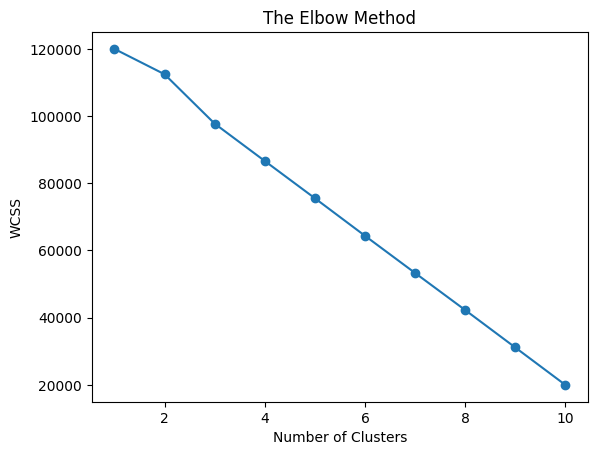

In [3]:

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

In [7]:
# Build the Recommendation System
def recommend_movies(movie_name, data, num_recommendations=5):
    # Find the cluster of the given movie
    movie_cluster = data.loc[data['Title'] == movie_name, 'Cluster'].values[0]
    
    # Get movies from the same cluster
    similar_movies = data[data['Cluster'] == movie_cluster]['Title']
    
    # Exclude the input movie from recommendations
    recommendations = similar_movies[similar_movies != movie_name].head(num_recommendations)
    
    return recommendations

In [9]:
# Test the Recommendation System
movie_to_recommend = "Mystic Falls 2"  # Replace with a movie in your dataset
print(f"Recommendations for '{movie_to_recommend}':")
print(recommend_movies(movie_to_recommend, data))


Recommendations for 'Mystic Falls 2':
4     Infinite Horizon 5
8     Infinite Horizon 9
9         Final Stand 10
10        Final Stand 11
13      The Awakening 14
Name: Title, dtype: object
